In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
var = pd.read_csv('HR_comma_sep.csv')
var1 = pd.get_dummies(var.Department)
var2 = pd.get_dummies(var.salary)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


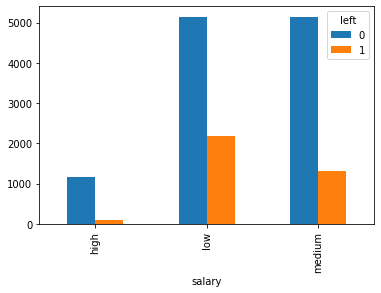

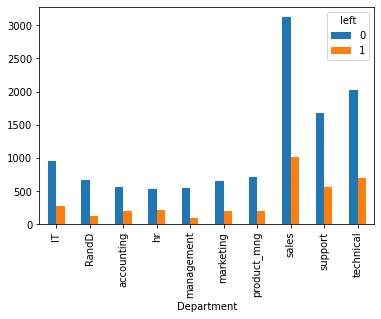

In [44]:
pd.crosstab(var.salary,var.left).plot(kind='bar')
pd.crosstab(var.Department,var.left).plot(kind='bar')
var.groupby('left').mean() #important factors are satisfaction_level,average_montly_hours,Work_accident,salary and promotion_last_5years

In [45]:
df = pd.concat([var,var2], axis = 'columns')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


In [46]:
df = df.drop(['Department','last_evaluation','salary','time_spend_company','number_project'],axis = 'columns' )
X = df.drop(['left'],axis = 'columns')
X

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,high,low,medium
0,0.38,157,0,0,0,1,0
1,0.80,262,0,0,0,0,1
2,0.11,272,0,0,0,0,1
3,0.72,223,0,0,0,1,0
4,0.37,159,0,0,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,0,0,1,0
14995,0.37,160,0,0,0,1,0
14996,0.37,143,0,0,0,1,0
14997,0.11,280,0,0,0,1,0


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df.left, test_size=0.2)
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


C:\Users\jhapr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7703333333333333

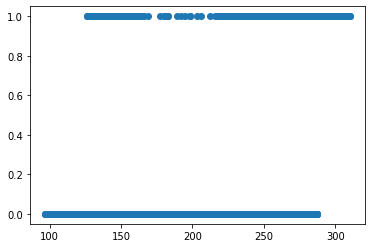

In [48]:
plt.scatter(X_test.average_montly_hours,y_test )

In [50]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2141,  142],
       [ 547,  170]], dtype=int64)

Text(69.0, 0.5, 'Truth')

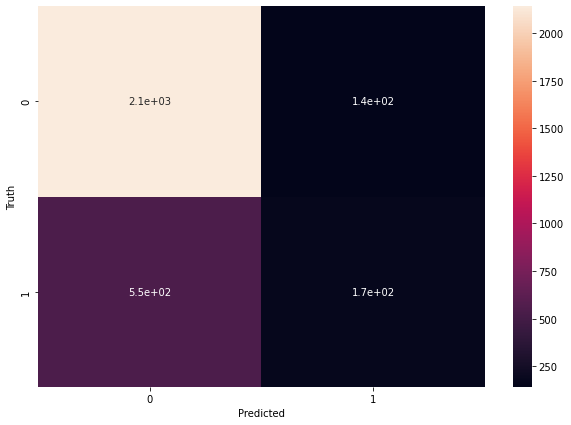

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')